Milestone 1

    Season  Number of Teams  Number of Drivers  Number of Races  \
0     1990               14                 39               16   
1     1991               12                 26               16   
2     1992               12                 26               16   
3     1993               12                 26               16   
4     1994               12                 26               16   
5     1995               12                 26               17   
6     1996               11                 22               16   
7     1997               11                 22               17   
8     1998               11                 22               16   
9     1999               11                 22               16   
10    2000               11                 22               16   
11    2001               11                 22               17   
12    2002               11                 22               17   
13    2003               11                 22               1

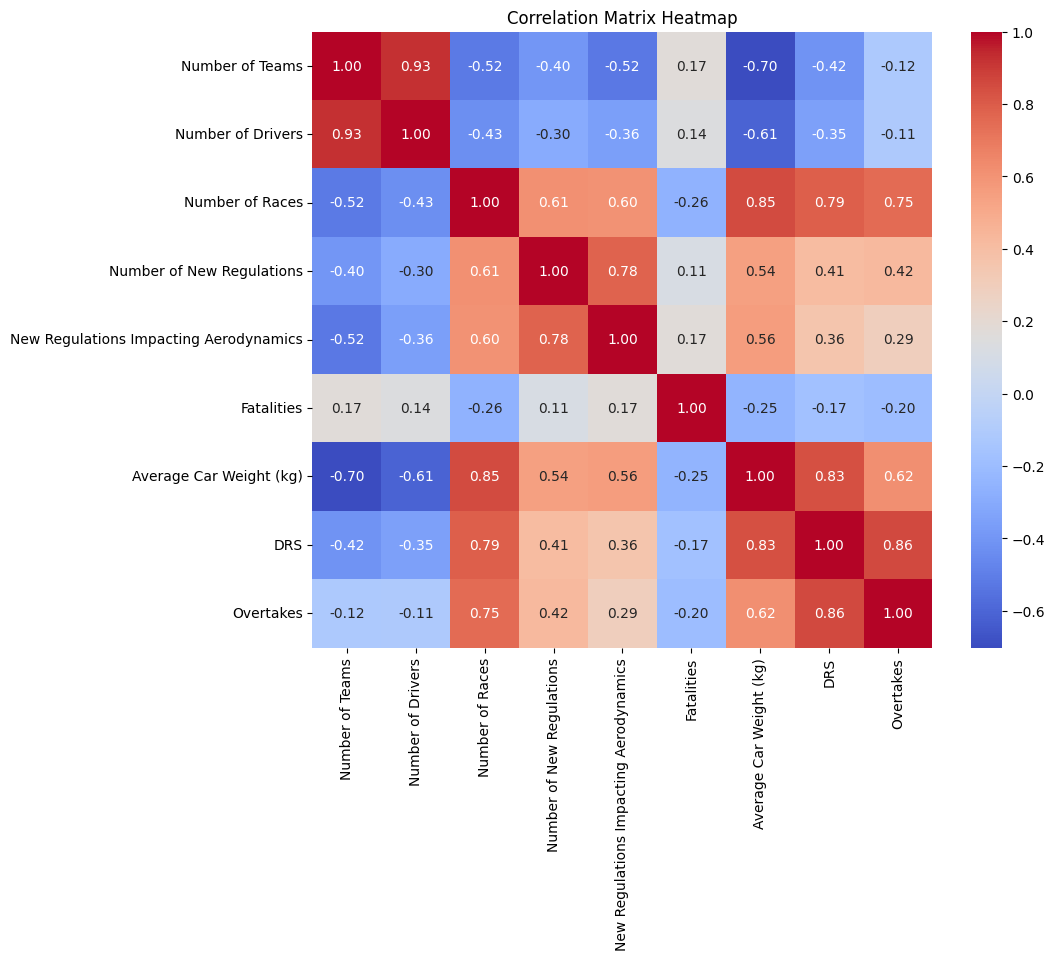

In [ ]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression


# File ID of the shared Google Drive file
file_id = "1Uu3Ku2B7nbddGdmgo06V5WQ86ntAbMai"

# Construct the URL to download the file
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Download the file and read it into a DataFrame
df = pd.read_csv(url)

# Convert DRS column from boolean to integer (1 for TRUE, 0 for FALSE)
df['DRS'] = df['DRS'].astype(int)

print(df)



# Display count of missing values per column\
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Generate descriptive statistics without the "Season" column
desc_stats = df.drop(columns=['Season']).describe()

# Drop the 'count' row from the descriptive statistics
desc_stats = desc_stats.loc[desc_stats.index != 'count']

print("Descriptive Statistics (without 'Season' and 'count'):\n", desc_stats)

# Assuming df is your DataFrame with DRS converted
# Drop non-numeric columns (like 'Season' if it's categorical)
numeric_df = df.drop(columns=['Season'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Define target and features
X = numeric_df.drop(columns=['Overtakes'])
y = numeric_df['Overtakes']

# Calculate mutual information
mutual_info = mutual_info_regression(X, y)

# Create a DataFrame for readability
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information with 'Overtakes':\n", mi_df)

Milestone 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variable 'DRS' (True/False) to numerical format if necessary
df['DRS'] = LabelEncoder().fit_transform(df['DRS'])

# Define features (independent variables) and the target variable (dependent variable)
X = df[['Number of Teams', 'Average Car Weight (kg)', 'Number of New Regulations', 'DRS']]
y = df['Overtakes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R², MAE, and MSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation results
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Feature impact analysis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)


Mutual Information with 'Overtakes':
                                   Feature  Mutual Information
6                 Average Car Weight (kg)            0.569216
7                                     DRS            0.511582
2                         Number of Races            0.238806
0                         Number of Teams            0.104464
1                       Number of Drivers            0.096169
4  New Regulations Impacting Aerodynamics            0.089027
3               Number of New Regulations            0.081899
5                              Fatalities            0.000000
R-squared (R²): 0.77
Mean Absolute Error (MAE): 174.92
Mean Squared Error (MSE): 35362.22
                     Feature  Coefficient
0            Number of Teams    57.315545
1    Average Car Weight (kg)    -0.765408
2  Number of New Regulations    62.320558
3                        DRS   627.647129


Milestone 3

Ridge Regression:
R²: 0.77, MAE: 177.69, RMSE: 190.52
Random Forest Regression:
R²: 0.77, MAE: 164.43, RMSE: 189.64
Polynomial Ridge Regression:
R²: 0.80, MAE: 163.04, RMSE: 176.97
                   Model  R-squared (R²)         MAE        RMSE
0      Linear Regression        0.774829  174.920028  188.048438
1       Ridge Regression        0.768873  177.691473  190.519400
2          Random Forest        0.771004  164.433289  189.639101
3  Poly Ridge Regression        0.800587  163.040591  176.966366


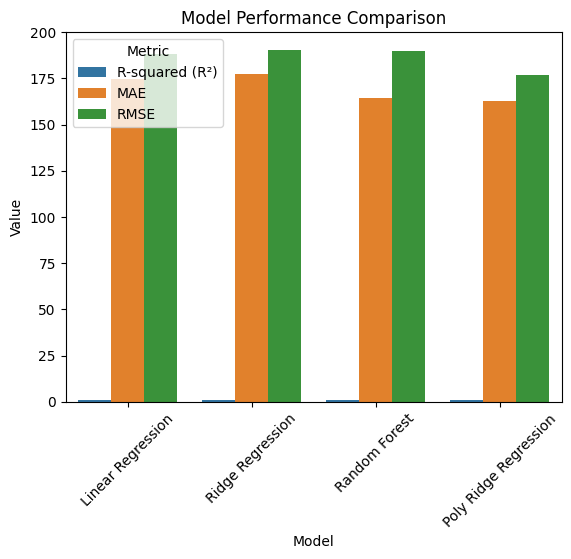

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# Ridge Regression with GridSearchCV
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# Best Ridge model and evaluation
ridge_best = ridge_cv.best_estimator_
ridge_pred = ridge_best.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)

print(f"Ridge Regression:\nR²: {ridge_r2:.2f}, MAE: {ridge_mae:.2f}, RMSE: {ridge_rmse:.2f}")

# Random Forest Regression with RandomizedSearchCV
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_cv.fit(X_train, y_train)

# Best Random Forest model and evaluation
rf_best = rf_cv.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = root_mean_squared_error(y_test, rf_pred)

print(f"Random Forest Regression:\nR²: {rf_r2:.2f}, MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")

# Polynomial Feature Expansion for Ridge Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

ridge_poly_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_poly_cv.fit(X_poly, y_train)

ridge_poly_best = ridge_poly_cv.best_estimator_
X_test_poly = poly.transform(X_test)
ridge_poly_pred = ridge_poly_best.predict(X_test_poly)

ridge_poly_r2 = r2_score(y_test, ridge_poly_pred)
ridge_poly_mae = mean_absolute_error(y_test, ridge_poly_pred)
ridge_poly_rmse = root_mean_squared_error(y_test, ridge_poly_pred)

print(f"Polynomial Ridge Regression:\nR²: {ridge_poly_r2:.2f}, MAE: {ridge_poly_mae:.2f}, RMSE: {ridge_poly_rmse:.2f}")

# Performance Comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Poly Ridge Regression'],
    'R-squared (R²)': [r2, ridge_r2, rf_r2, ridge_poly_r2],
    'MAE': [mae, ridge_mae, rf_mae, ridge_poly_mae],
    'RMSE': [mse**0.5, ridge_rmse, rf_rmse, ridge_poly_rmse]
})

print(results)

# Visualization
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Value')
sns.barplot(data=results_melted, x='Model', y='Value', hue='Metric')
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()